In [1]:
import numpy as np
import sys
sys.path.append('../lib')
from libsim import simulate
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
name = 'harmonic_test'
num_particles = 50000
M = np.array([0]).astype(np.float64)
S = np.array(np.random.uniform(0.75, 2.5, size=1)).astype(np.float64)
D = np.random.uniform(0.5, 1.5)
beta = np.random.uniform(1, 2.5)
dt = 0.001
total_steps = 10000
equilibration_time = 0
x0 = 2.15
x0s = np.ones(num_particles) * x0

print('S={}, D={}, beta={}, total steps={}'.format(S[0], D, beta, total_steps))

S=1.8390931277543379, D=1.1217641487869927, beta=1.372512960512137, total steps=10000


In [13]:
xs = simulate(num_particles,
              random=0, x0s=x0s,
              S=S, M=M,
              D=D, beta=beta,
              dt=dt, total_steps=total_steps, equilibration_time=equilibration_time,
              )

100%|██████████| 9999/9999 [04:09<00:00, 40.14it/s]


In [14]:
mean_xs = np.mean(xs, axis=1)
var_xs = np.var(xs, axis=1)

In [15]:
def mean(tau, dt=0.001, x0=1, D=1, s=1):
    t = dt * tau
    return x0*np.exp(-D*t/(s**2))

def var(tau, dt=0.001, D=1, s=1):
    t = dt * tau
    return s**2*(1-np.exp(-2*D*t/s**2))

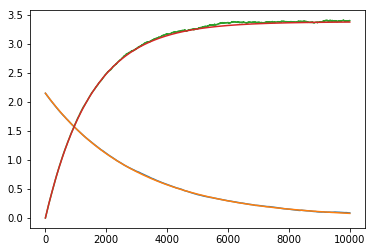

In [16]:
ts = np.arange(0, total_steps, 1)
s = S[0]
plt.plot(ts, mean_xs)
plt.plot(ts, mean(ts, dt, x0, D, s))
plt.plot(ts, var_xs)
plt.plot(ts, var(ts, dt, D, s))